In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
train = pd.read_csv('train.csv')
pd.set_option("display.max_rows", None, "display.max_columns", None)# THANKS to Daniel
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.shape

(1460, 81)

In [4]:
# This is to see how many null values we have in the data set:
null_col = train.isnull().sum() /len(train) 
null_col = null_col[null_col>.2]
null_col

Alley          0.937671
FireplaceQu    0.472603
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [5]:
# here we drop the columns that have more than 20% null value:
df_null = train.isnull().sum() / len(train)
df_null_cols = df_null[df_null > .2].index
final_df = train.drop(df_null_cols, axis=1)
final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
final_df.shape


(1460, 76)

In [7]:
# drop rows that contain any NaN:
train2 = final_df.dropna()
train2.shape


(1094, 76)

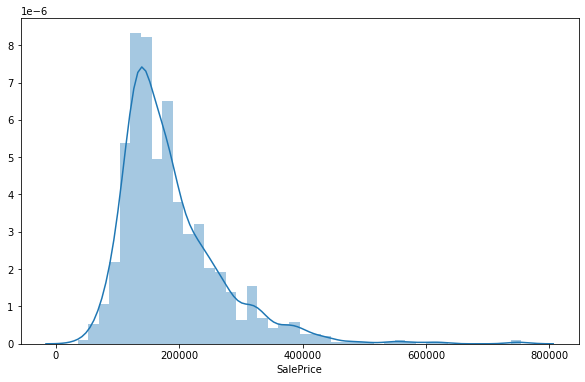

In [8]:
plt.figure(figsize = (10,6))

sns.distplot(train2['SalePrice']) #distribution plot
plt.show()
#most of the density lies between 150-200k
#right skewd data shows there are minoruty of very large values



In [9]:
# to find th emax of a column
print('Min: ', train2['SalePrice'].min())
print('Max: ', train2['SalePrice'].max())

Min:  35311
Max:  755000


In [10]:
# in order to normalise the data, we use Log
np.log(np.e)
# this seems to work only for right skewed.


1.0

In [11]:
print('Min: ', np.log(train2['SalePrice'].min()))
print('Max: ', np.log(train2['SalePrice'].max()))

Min:  10.47194980911048
Max:  13.534473028231162


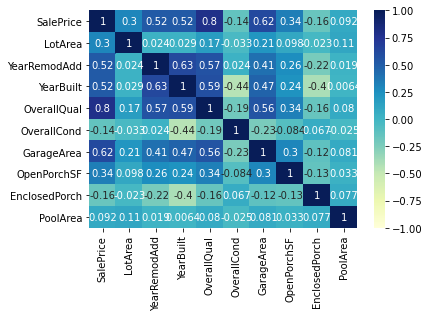

In [12]:
# now we use heatmap to visualise the correlation of our selected variables:

COR = train2[['SalePrice','LotArea', 'YearRemodAdd', 'YearBuilt',
'OverallQual', 'OverallCond', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch',
'PoolArea']]

sns.heatmap(COR.corr(), vmin=-1, vmax=1, cmap='YlGnBu', annot= True)

In [13]:
# from Filipa: this will give you  numerous plots of data and it takes time.

#sns.pairplot(final_df) # THANKS to Filipa :) 

In [14]:
# to get the correlation of the variables we feel relevant:
train2[['SalePrice','LotArea', 'YearRemodAdd', 'YearBuilt',
'OverallQual', 'OverallCond', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch',
'PoolArea']].corr()

,SalePrice,LotArea,YearRemodAdd,YearBuilt,OverallQual,OverallCond,GarageArea,OpenPorchSF,EnclosedPorch,PoolArea
SalePrice,1.000000,0.302268,0.519806,0.523434,0.795437,-0.138511,0.620772,0.338600,-0.161711,0.092085
LotArea,0.302268,1.000000,0.024308,0.028954,0.169876,-0.033113,0.213104,0.098051,-0.022789,0.109294
YearRemodAdd,0.519806,0.024308,1.000000,0.625905,0.568582,0.024427,0.413917,0.259469,-0.220843,0.018813
YearBuilt,0.523434,0.028954,0.625905,1.000000,0.590761,-0.437647,0.470809,0.235486,-0.399540,0.006402
OverallQual,0.795437,0.169876,0.568582,0.590761,1.000000,-0.189587,0.555315,0.335884,-0.155080,0.080037
OverallCond,-0.138511,-0.033113,0.024427,-0.437647,-0.189587,1.000000,-0.233585,-0.084405,0.067124,-0.024919
GarageArea,0.620772,0.213104,0.413917,0.470809,0.555315,-0.233585,1.000000,0.303611,-0.117481,0.081126
OpenPorchSF,0.338600,0.098051,0.259469,0.235486,0.335884,-0.084405,0.303611,1.000000,-0.132970,0.033044
EnclosedPorch,-0.161711,-0.022789,-0.220843,-0.399540,-0.155080,0.067124,-0.117481,-0.132970,1.000000,0.076672
PoolArea,0.092085,0.109294,0.018813,0.006402,0.080037,-0.024919,0.081126,0.033044,0.076672,1.000000


In [15]:
# this is to find the correlation of SalePrice with other variables:
CORR = pd.DataFrame(train2[['SalePrice','LotArea', 'YearRemodAdd',
'OverallQual', 'OverallCond', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch',
'PoolArea']].corr()['SalePrice'])
CORR

,SalePrice
SalePrice,1.000000
LotArea,0.302268
YearRemodAdd,0.519806
OverallQual,0.795437
OverallCond,-0.138511
GarageArea,0.620772
OpenPorchSF,0.338600
EnclosedPorch,-0.161711
PoolArea,0.092085


In [16]:
#creating dataframe with columns and correlations with SalePrice:

fltr = pd.DataFrame(train2.corrwith(train2['SalePrice']), columns=['correlation']).reset_index()
#filter correlation between 0.5 and -0.5:
fltr1= fltr[(fltr['correlation']>=0.50) | (fltr['correlation']>=0.50)]
fltr1

,index,correlation
4,OverallQual,0.795437
6,YearBuilt,0.523434
7,YearRemodAdd,0.519806
12,TotalBsmtSF,0.617741
13,1stFlrSF,0.617692
16,GrLivArea,0.707481
19,FullBath,0.578299
23,TotRmsAbvGrd,0.560521
25,GarageYrBlt,0.502248
26,GarageCars,0.652103


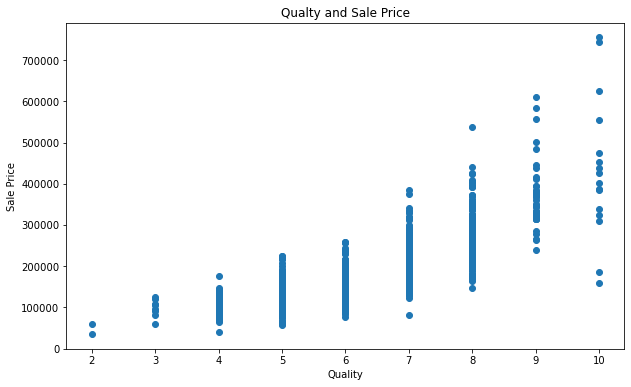

In [17]:
plt.figure(figsize = (10,6))
plt.scatter(train2['OverallQual'], train2['SalePrice'])
plt.xlabel('Quality')
plt.ylabel('Sale Price')
plt.title('Qualty and Sale Price')
plt.show()


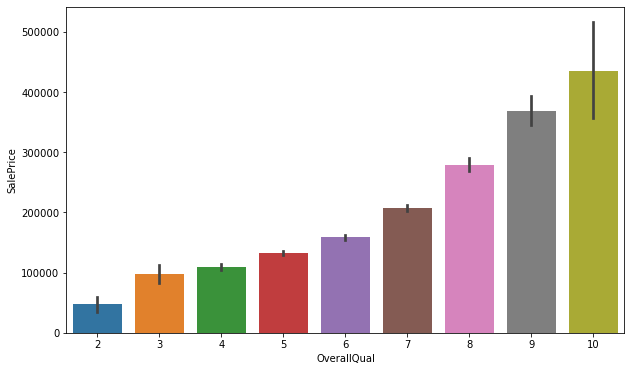

In [18]:
plt.figure(figsize = (10,6))

sns.barplot(x='OverallQual',y='SalePrice', data=train2)
plt.show()

# larger black error bars mean larger spread, data are far from the mean

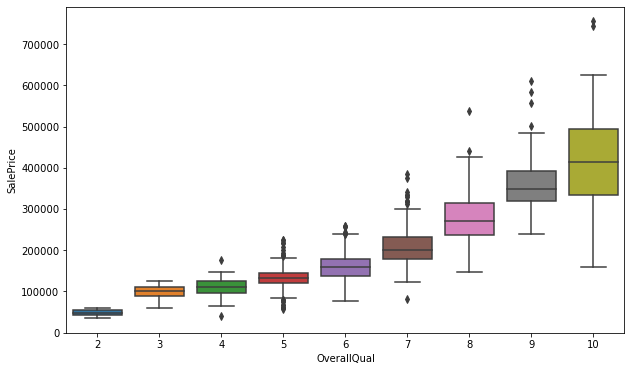

In [19]:
plt.figure(figsize = (10,6))

sns.boxplot(x='OverallQual',y='SalePrice', data=train2)
plt.show()

# shows the outliers, the interquartile range is larger on quality 10.

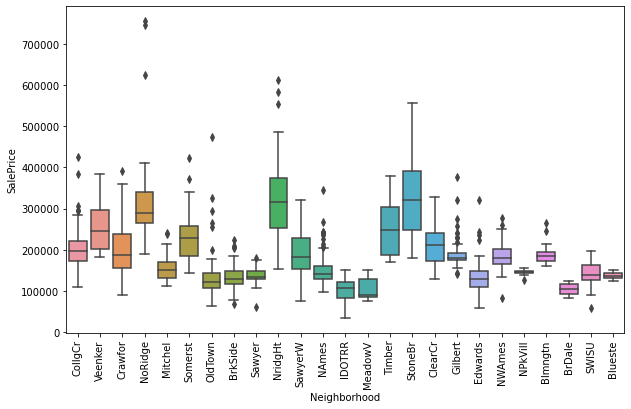

In [20]:
plt.figure(figsize = (10,6))

sns.boxplot(x='Neighborhood',y='SalePrice', data=train2)
plt.xticks(rotation=90)
plt.show()

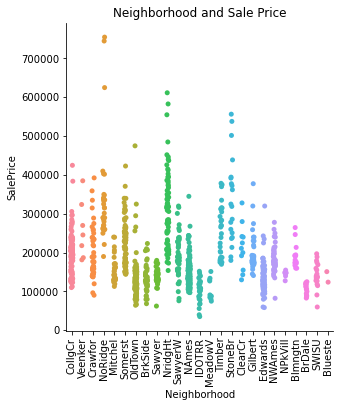

In [21]:
sns.catplot(data=train2, x='Neighborhood', y='SalePrice')
plt.xticks(rotation=90)
plt.title('Neighborhood and Sale Price')
plt.show()

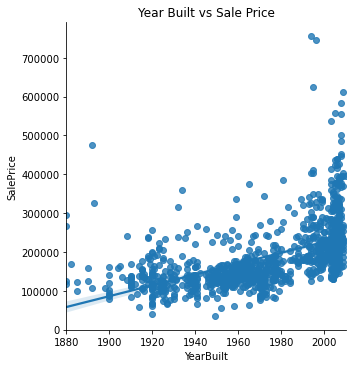

In [22]:
sns.lmplot(data=train2, x='YearBuilt', y='SalePrice')
plt.title('Year Built vs Sale Price')
plt.show()

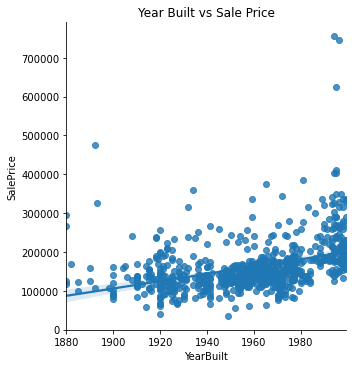

In [23]:
#if we would like to choose a range for the 
sns.lmplot(data=train2[train2['YearBuilt']<2000], x='YearBuilt', y='SalePrice')
plt.title('Year Built vs Sale Price')
plt.show()

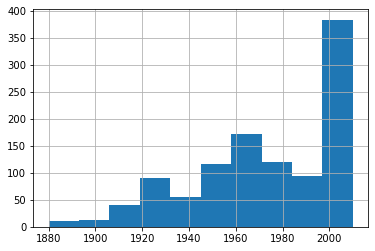

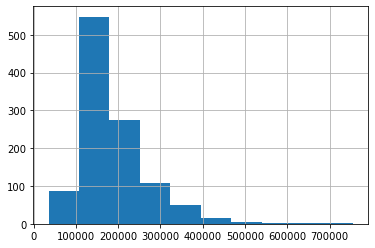

In [27]:
train2['YearBuilt'].hist()
plt.show()
train2['SalePrice'].hist()
plt.show()

In [34]:
# in order to find the age of the properties:
#train2['Age']=(2020-train2['YearBuilt'])
#train2['Age']

In [24]:
# we wish to change the categorical data into numeric:
train2['HouseStyle'].value_counts()
housestyle=pd.get_dummies(train2['HouseStyle'], drop_first=True)
housestyle

,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0
10,0,1,0,0,0,0,0


In [ ]:
# we use drop_first to create a base variable for comparison purposes(here is 1.5Fin):
# when we run the regression, if the categorical variable of '1Story' is not significant,
# then the price of '1Story' is not different from that of '1.5Fin'.
# if the categorical variable of '1Story' is significant and positive,
# then the price of '1Story' is more expensive than that of '1.5Fin'.
# if the categorical variable of '1Story' is significant and negative,
# then the price of '1Story' is cheaper than that of '1.5Fin'.

In [39]:
#REGRESSION:

Y = train2["SalePrice"]
X = train2[["LotArea", 'YearRemodAdd', 'YearBuilt','OverallQual', 
            'OverallCond', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch','PoolArea']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     290.5
Date:                Sun, 15 Nov 2020   Prob (F-statistic):          1.26e-281
Time:                        17:33:35   Log-Likelihood:                -13274.
No. Observations:                1094   AIC:                         2.657e+04
Df Residuals:                    1084   BIC:                         2.662e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.564e+05    1.7e+05     -4.460

In [40]:
X = train2[["LotArea", 
            'OverallCond', 'GarageArea', 'OpenPorchSF', 'YearBuilt']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     236.1
Date:                Sun, 15 Nov 2020   Prob (F-statistic):          9.62e-171
Time:                        17:33:35   Log-Likelihood:                -13543.
No. Observations:                1094   AIC:                         2.710e+04
Df Residuals:                    1088   BIC:                         2.713e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.848e+06   1.39e+05    -13.282      

In [41]:
# Regression with dummy variables:

X1=pd.concat([X, housestyle], axis=1)

X1 = sm.add_constant(X1)
model = sm.OLS(Y, X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     109.9
Date:                Sun, 15 Nov 2020   Prob (F-statistic):          1.29e-177
Time:                        17:33:36   Log-Likelihood:                -13509.
No. Observations:                1094   AIC:                         2.704e+04
Df Residuals:                    1081   BIC:                         2.711e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.119e+06   1.48e+05    -14.327      

In [42]:
#train2['OverallQual'].head()

In [46]:
Y_pred=results.predict(X1)
#Y_pred
#Y

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
8       129900
9       118000
10      129500
11      345000
13      279500
15      132000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
40      160000
41      170000
44      141000
45      319900
46      239686
47      249700
49      127000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
65      317000
67      226000
68       80000
69      225000
70      244000
71      129500
72      185000
73      144900
74      107400
75       91000
77      127000
79      110000
80      193500
81      153500
82      24

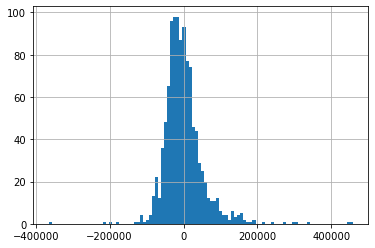

In [52]:
residuals=Y-Y_pred
residuals.hist(bins=100)
plt.show()

In [68]:
#performance of the model:
MSE= np.mean([i **2 for i in residuals])
RMSE=np.sqrt(MSE)
RMSE

55793.00818487746

In [71]:
#amature solution:
mse=((Y-Y_pred)**2)/len(Y)
rmse=np.sqrt(mse.sum())
rmse

3112859762.317803